# Exercise Eight: Cultural Data

For this exercise, pick a dataset of current or historical cultural data available in CSV format from one of the suggeted sources, or your own research. This will be easiest if your data includes some element of information over time. You'll be using the "group by" methods we discussed this week to make comparisons within the dataset: you might group by geography, party affiliation, age, gender, or other information marked in the dataset.

Your annotated code should include headings, and discuss your findings as well as the limitations in what you can visualize using this approach. This exercise should:

- 1 Import your selected structured CSV data
- 2 Use Pandas to note any preliminary trends in the CSV as a dataframe
- 3 Use "group by" to break down at least two different subsets of data
- 4 Plot a comparison between the grouped data (this will be easiest over time)
- 5 Use one additional form of analysis or visualization from any we've tried so far

# Step One

In this first cell, I imported Pandas and renamed it pd.  Then, I imported my csv file.  This file contains the interment data from the Aisne-Marne American Cemetery in France.  This cemetery primarily contains war dead from the WWI Marne Valley Campaigns in the summer of 1918.  It also contains those that died in the area as part of the post-war occupation force.  I obtained this data from the American Battle Monuments Commission website.  This data is pertinent to my larger research on veteran memory.  The cell printed out the data frame headings and their types.  

In [1]:
import pandas as pd
df = pd.read_csv('amac_inter_data_clean.csv')
# Prints how pd will structure data types
print(df.dtypes)

Last Name                 object
First Name                object
Middle Name               object
Suffix                    object
Rank                      object
Branch                    object
field_place_of_entry      object
Day of Death             float64
Month of Death            object
Year of Death            float64
Plot                      object
Row                      float64
Grave                    float64
Memorialized Location     object
 Cemetery/Memorial        object
War/Conflict              object
Awards                    object
ABMC Burial Unit          object
dtype: object


# Step Two

In this step, I reorganized and indexed the data frames to view some preliminary trends.  The first cell organized the data by year of death.  I then indexed the data in the second cell to list the deaths that occurred in 1919, the first year post-war.  These were deaths from the occupation force and may indicate deaths from the 1918-19 flu pandemic.

In [2]:
df = pd.read_csv('amac_inter_data_clean.csv')
df = df.set_index('Year of Death')
df.head()

,Last Name,First Name,Middle Name,Suffix,Rank,Branch,field_place_of_entry,Day of Death,Month of Death,Plot,Row,Grave,Memorialized Location,Cemetery/Memorial,War/Conflict,Awards,ABMC Burial Unit
Year of Death,,,,,,,,,,,,,,,,,
1918.0,Abbott,Leon,E,NaN,Private,U.S. Army,Massachusetts,13.0,July,A,13.0,70.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"101st Infantry Regiment, 26th Division"
1918.0,Abbott,Mike,NaN,NaN,Private,U.S. Army,New York,18.0,July,NaN,NaN,NaN,Tablets of the Missing,Aisne-Marne American Cemetery,World War I,NaN,"9th Infantry Regiment, 2nd Division"
1918.0,Aberman,Harry,NaN,NaN,Private,U.S. Army,Pennsylvania,26.0,July,A,10.0,11.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"4th Infantry Regiment, 3rd Division"
1918.0,Abrams,Edward,B,NaN,Corporal,U.S. Marine Corps,New Jersey,12.0,June,NaN,NaN,NaN,Tablets of the Missing,Aisne-Marne American Cemetery,World War I,NaN,"5th USMC Regiment, 2nd Division"
1918.0,Acree,Auther,NaN,NaN,Private First Class,U.S. Army,Alabama,15.0,July,B,11.0,19.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"167th Infantry Regiment, 42nd Division"


In [3]:
df.loc[1919].head()

,Last Name,First Name,Middle Name,Suffix,Rank,Branch,field_place_of_entry,Day of Death,Month of Death,Plot,Row,Grave,Memorialized Location,Cemetery/Memorial,War/Conflict,Awards,ABMC Burial Unit
Year of Death,,,,,,,,,,,,,,,,,
1919.0,Afarian,Haroutun,NaN,NaN,Private,U.S. Army,New Jersey,5.0,March,B,11.0,11.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"310th Infantry Regiment, 78th Division"
1919.0,Atkinson,Paul,S,NaN,Second Lieutenant,U.S. Army,California,13.0,April,B,7.0,58.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"6th Ammunition Trains, 6th Division"
1919.0,Booth,Allen,J,NaN,Private First Class,U.S. Army,South Carolina,11.0,February,B,11.0,29.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"323rd Infantry Regiment, 81st Division"
1919.0,Callahan,Sylvester,W,NaN,Sergeant First Class,U.S. Army,Pennsylvania,11.0,March,B,7.0,57.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,57th Camp Hospital
1919.0,Clark,John,F,NaN,Sergeant First Class,U.S. Army,Louisiana,27.0,February,B,9.0,17.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,20th Engineer Regiment


# Step THree

In this step I used the group by function to make subsets of data and make some new comparisons.  In the first cell, I grouped all the deaths from the state of Florida.  In the second cell I expanded my research on deaths by state.  I grouped in the branch of service.  The printout orders the states alphabetically, then breaks them down by branch, showing the number of deaths per branch per state.  

In [4]:
state = df.groupby('field_place_of_entry')
state.get_group('Florida').head()

,Last Name,First Name,Middle Name,Suffix,Rank,Branch,field_place_of_entry,Day of Death,Month of Death,Plot,Row,Grave,Memorialized Location,Cemetery/Memorial,War/Conflict,Awards,ABMC Burial Unit
Year of Death,,,,,,,,,,,,,,,,,
1918.0,Brandon,Ian,NaN,NaN,Private,U.S. Marine Corps,Florida,6.0,June,NaN,NaN,NaN,Tablets of the Missing,Aisne-Marne American Cemetery,World War I,NaN,"5th USMC Regiment, 2nd Division"
1919.0,Emerson,Clyde,A,NaN,Sergeant,U.S. Army,Florida,30.0,January,B,11.0,8.0,NaN,Aisne-Marne American Cemetery,World War I,NaN,"318th Machine Gun Battalion, 81st Division"
1918.0,Hon,Paul,L,NaN,Sergeant,U.S. Army,Florida,20.0,July,NaN,NaN,NaN,Tablets of the Missing,Aisne-Marne American Cemetery,World War I,NaN,"1st Engineer Regiment, 1st Division"
1918.0,McGraw,Matthew,C,NaN,Private,U.S. Army,Florida,20.0,July,NaN,NaN,NaN,Tablets of the Missing,Aisne-Marne American Cemetery,World War I,NaN,"26th Infantry Regiment, 1st Division"
1918.0,Pilcher,Luther,W,NaN,Sergeant,U.S. Marine Corps,Florida,6.0,June,B,10.0,68.0,NaN,Aisne-Marne American Cemetery,World War I,Navy Cross and Distinguished Service Cross,"5th USMC Regiment, 2nd Division"


In [5]:
amac_state_branch_comparison = df.groupby(['field_place_of_entry','Branch'])['Last Name'].count()
amac_state_branch_comparison.head()

# I’d like to make this data subset its own file so I can view and analyze all of it.  I tried a few methods to write a file, but got errors each time.  Do you have any suggestions?

field_place_of_entry  Branch           
Alabama               U.S. Army            57
                      U.S. Marine Corps     2
Arizona               U.S. Army             1
                      U.S. Marine Corps     2
Arkansas              U.S. Army            28
Name: Last Name, dtype: int64

# Step Four

This step generated a plot to show the textual data from the previous step.  It uses colored lines to represent branches of service.  The y axis is the deaths and the x axis is supposed to read out the states by name, but this is not clear.  I attempted this a few different ways.  This was the most legible plot, despite the lack of state names across the bottom.    

Branch
U.S. Army            AxesSubplot(0.125,0.125;0.775x0.755)
U.S. Marine Corps    AxesSubplot(0.125,0.125;0.775x0.755)
U.S. Navy            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Last Name, dtype: object

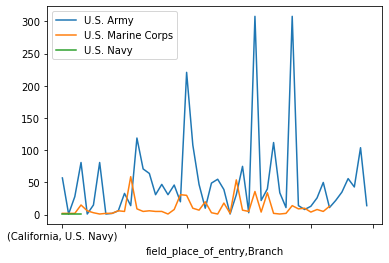

In [6]:
amac_state_branch_comparison.groupby(['Branch']).plot(legend=True)

# Step 5

This step shows a simpler visualization than the above plot.  It breaks down the number of deaths by state.  In my first generation, I printed 10 states.  I noticed, with the exception of California, it was all northern states.  I expanded the list to 20.  The first southern state ranks at 12, but the majority of them are north of 15.  This would be interesting data to compare to state populations and enlistments totals.  

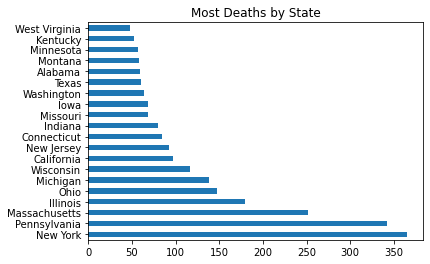

In [7]:
df['field_place_of_entry'].value_counts()[:20].plot(kind="barh", title="Most Deaths by State")